<h1>Reducing an image shape - image samples</h1>
<br>
<strong>
    In this short notebook I study how to change the shape of my database of image files.
    In fact, in building my neural network classification model, I cannot exploit the whole dataset because, at the point of normalizing the data (divide pixel values by 255 (max pixel value)), I create a 4D array (an array of more than 80k 3D matrices) of float64 data types, which requires (according to Windows' error message) some 92GB of memory.
    There are two strategies possible to solve this problem:
<br>

    1. reduce the sample size: this in turn can be done by 
        1. reducing the bird species in the dataset;
        2. reducing the number of images for each species;
        3. both 1. and 2.

        It is to be noted that I could execute my model only after reducing the number of species to 100 (selected randomly) and the number of images per species to 25.
<br>

    2. reduce the images' shape in order to work with smaller matrices at the point of normalizing the data and thus using  less memory.

In the following sections I'll a couple of images from the dataset and apply some reshaping to one of them.
</strong>

In [1]:
### IMPORT NEEDED MODULES ###
import os
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import numpy as np

In [2]:
# import files to Google Colab
'''
from google.colab import files
files.upload()
'''

'\nfrom google.colab import files\nfiles.upload()\n'

<h3>Choosing the main image folder</h3>
<br>
<strong>
The following code allows me to set the main folder where my dataset resides. For the purpose of this document, I prefer to limit the choice to the Test folder, which contains less images and is thus more treatable.
    I also show an image from the <i>sunbittern</i> bird species.
</strong>

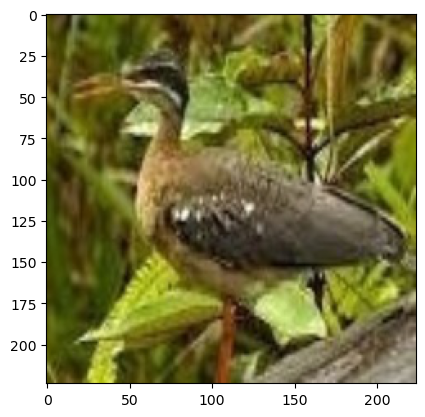

In [3]:
# set the folder where the files of interest are located
#originFolder = '/content/' # file folder in colab
originFolder = 'C:/Users/mzlarosa/OneDrive - unime.it/Learning/CdL Informatica/Anno II - Devices and circuits for artificial intelligence/project/dataset/archive/Test/'

# try viewing one image from one of the subfolders of the origin folder
classes = os.listdir(originFolder)
images = list()
for species in classes:
    if species == 'SUNBITTERN':
        for img in os.listdir(originFolder + species):
            image = mpimg.imread(originFolder + species + '/' + img)
            plt.imshow(image)

<h3>Building a sample of two images</h3>
<br>
<strong>
    I choose to sample the first two images from the first bird species (<i>abbotts babbler</i>).
</strong>

In [4]:
# deciding two images to inspect and edit
content = os.listdir(originFolder)[0]
myContent = os.listdir(originFolder + content)[0 : 2]
myContent

# setting up empty lists to fill with the two images
mpimgImages = list()
cv2Images = list()

<strong>
    I first read them with the <i>imread</i> function from the <i>Image</i> library of the <i>matplotlib</i> module and plot the one next to the other. I also show the images' data types and array shapes.
<strong>


Images read with the mpimg module have types: <class 'numpy.ndarray'> and <class 'numpy.ndarray'>, and shapes (224, 224, 3) and (224, 224, 3).


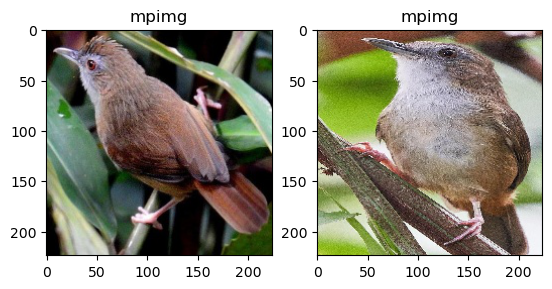

In [5]:
# reading images with imread from matplotlib.Image
plt.figure()
for i in range(0, len(myContent)):
  image = mpimg.imread(originFolder + content + '/' + myContent[i])
  imageType = type(image)
  imageShape = image.shape
  mpimgImages.append(imageType)
  mpimgImages.append(imageShape)
  plt.subplot(1, 2, i + 1)
  plt.title('mpimg')
  plt.imshow(image)
print()
print('Images read with the mpimg module have types: %s and %s, and shapes %s and %s.' % (mpimgImages[0], mpimgImages[2], mpimgImages[1], mpimgImages[3]))

<strong>
    I do the same with the <i>imread</i> function from the <i>cv2</i> module and plot the one next to the other. I also show the images' data types and array shapes.
<strong>

Images read with the cv2 module have types: <class 'numpy.ndarray'> and <class 'numpy.ndarray'>, and shapes (224, 224, 3) and (224, 224, 3).


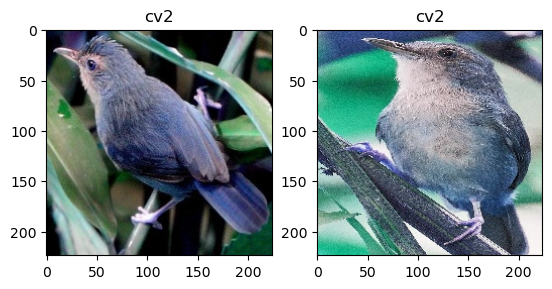

In [6]:
# reading images with imread from cv2
plt.figure()
for i in range(0, len(myContent)):
  imageCV2 = cv2.imread(originFolder + content + '/' + myContent[i])
  imageCV2Type = type(imageCV2)
  imageCV2Shape = imageCV2.shape
  cv2Images.append(imageCV2Type)
  cv2Images.append(imageCV2Shape)
  plt.subplot(1, 2, i + 1)
  plt.title('cv2')
  plt.imshow(imageCV2)
print('Images read with the cv2 module have types: %s and %s, and shapes %s and %s.' % (cv2Images[0], cv2Images[2], cv2Images[1], cv2Images[3]))

<h3>Edit one image</h3>
<br>
<strong>
    I pick one of the two images and read it in its original size with the cv2 module.
</strong>

<class 'numpy.ndarray'> (224, 224, 3)


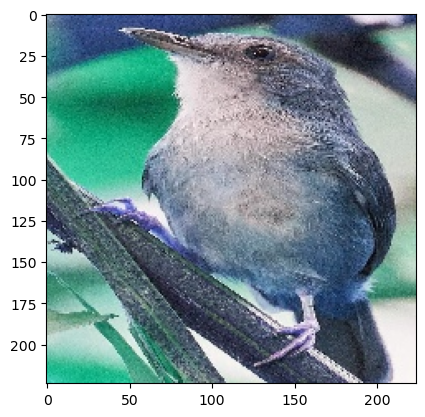

In [7]:
# choosing one image read with cv2 and show it in original shape (224, 224, 3)
myCV2Image = cv2.imread(originFolder + content + '/' + myContent[1])
plt.imshow(myCV2Image)
print(type(myCV2Image), myCV2Image.shape)
#plt.savefig('/content/bird.jpg') # save in colab
plt.savefig('/Users/mzlarosa/Downloads/bird.jpg')

<strong>
    I use the <i>.resize</i> property of cv2 images to change the image shape. I choose to halve the number of pixels in both height and width, and to use the <i>pixel area relation</i> interpolation method.
</strong>

<class 'numpy.ndarray'> (112, 112, 3)


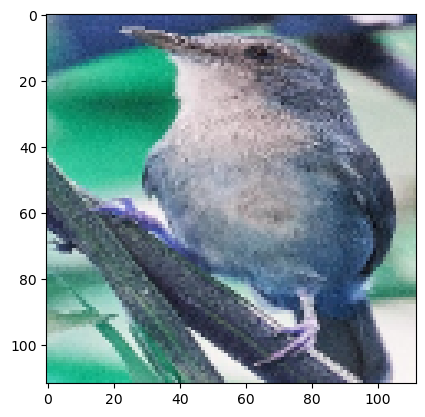

In [8]:
# show chosen image in half shape (112, 112, 3)
myHalfCV2Image = cv2.resize(myCV2Image, (112, 112), interpolation = cv2.INTER_AREA)
plt.imshow(myHalfCV2Image)
print(type(myHalfCV2Image), myHalfCV2Image.shape)
#plt.savefig('/content/halfBird.jpg') # save in colab
#plt.savefig('/Users/mzlarosa/Downloads/halfBird.jpg') # save in Downloads

<strong>
    Here I keep half the image height and width but to change interpolation method to <i>nearest neighbor</i>, which seems to behave worse than pixel area relation.
</strong>

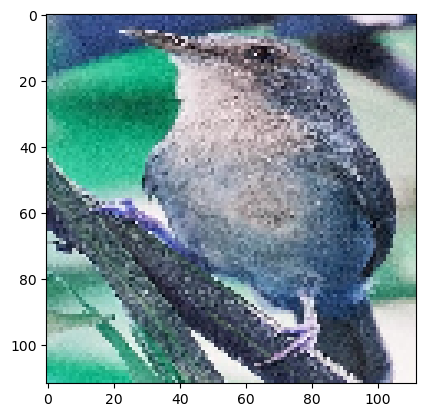

In [9]:
# show chosen image in half shape (112, 112, 3) with different interpolation
mySecondHalfCV2Image = cv2.resize(myCV2Image, (112, 112), interpolation = cv2.INTER_NEAREST)
plt.imshow(mySecondHalfCV2Image)

<strong>
    I finally try reducing the image height and width to a quarter their original number of pixels (with <i>pixel area relation</i> interpolation). The result is much more blurred but I expect that it returns acceptable classification results when applied to a large number of images.
</strong>

<class 'numpy.ndarray'> (56, 56, 3)


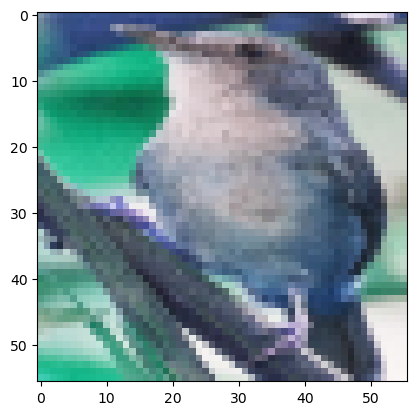

In [10]:
# show chosen image in a quarter of its shape (112, 112, 3)
myQuarterCV2Image = cv2.resize(myCV2Image, (56, 56), interpolation = cv2.INTER_AREA)
plt.imshow(myQuarterCV2Image)
print(type(myQuarterCV2Image), myQuarterCV2Image.shape)
#plt.savefig('/Users/mzlarosa/Downloads/quarterBird.jpg')

<h3>Show arrays</h3>
<br>
<strong>
    I have a quick look at the structure of the array. I just open the full matrix of the first colour channel (the first of the three matrices that build up the colour image) and then the last point of the first colour channel.
</strong>

In [11]:
# show the first channel matrix of the original and resized images
print('Original image')
print(myCV2Image[:, :, 0])
print('\nHalf-sized image')
print(myHalfCV2Image[:, :, 0])
print('\nQuarter-sized image')
print(myQuarterCV2Image[:, :, 0])

Original image
[[136 134 129 ...  71  59  56]
 [136 135 135 ...  41  70  36]
 [131 131 108 ...  51  51  32]
 ...
 [ 65  61  65 ... 251 252 251]
 [ 71  62  69 ... 251 252 251]
 [ 74  69  55 ... 251 252 251]]

Half-sized image
[[135 127 116 ...  73  51  55]
 [132 114 106 ...  63  47  47]
 [116 123  93 ...  57  44  54]
 ...
 [ 50  41  34 ... 250 249 250]
 [ 61  56  52 ... 251 250 251]
 [ 69  69  69 ... 250 251 252]]

Quarter-sized image
[[127 102  81 ... 182  80  50]
 [111  88  73 ... 148  79  74]
 [100  87  69 ... 134 141 145]
 ...
 [ 34  33  39 ... 248 248 249]
 [ 37  34  26 ... 248 249 250]
 [ 64  56  42 ... 250 250 251]]


In [12]:
# show the last point from the first channel matrix of the original and resized images
print('Original image')
print(myCV2Image[223, 223, 0])
print('\nHalf-sized image')
print(myHalfCV2Image[111, 111, 0])
print('\nQuarter-sized image')
print(myQuarterCV2Image[55, 55, 0])

Original image
251

Half-sized image
252

Quarter-sized image
251


<h3>Show original image and resized ones in properly sized windows</h3>
<br>
<strong>
    I finally show the original image and its two reshapes as they fit windows of their actual size (224*224 pixels, or 112*112 pixels or 56*56 pixels).
</strong>

<class 'numpy.ndarray'> (224, 224, 3)


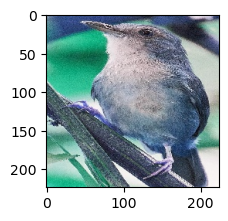

In [13]:
# show the original image in a window fitting its shape (224 height, 224 width)
plt.figure(figsize = (2.24, 2.24))
plt.imshow(myCV2Image)
print(type(myCV2Image), myCV2Image.shape)


<class 'numpy.ndarray'> (112, 112, 3)


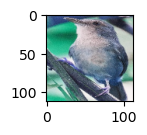

In [14]:
# show the half-sized image in a window fitting its shape (112 height, 112 width)
plt.figure(figsize = (1.12, 1.12))
plt.imshow(myHalfCV2Image)
print(type(myHalfCV2Image), myHalfCV2Image.shape)

<class 'numpy.ndarray'> (56, 56, 3)


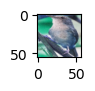

In [15]:
# show the quarter-sized image in a window fitting its shape (56 height, 56 width)
plt.figure(figsize = (0.56, 0.56))
plt.imshow(myQuarterCV2Image)
print(type(myQuarterCV2Image), myQuarterCV2Image.shape)